# Data Visualization
Alexander Bedine  
ajb20dd@fsu.edu  
October 15, 2024

## Table of Contents

 - [Environment Setup](#environment-setup)
 - [Obesity Rate Histogram](#obesity-rate-histogram)
 - [Sleep Rate Histogram](#sleep-rate-histogram)
 - [Correlation Scatterplot](#correlation-scatterplot)
 - [Correlation Heatmap](#correlation-heatmap)
 - [Final Figure](#final-figure)

### Environment Setup

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import dependencies with aliases

In [48]:
healthdf = pd.read_csv("C:/Users/alexb/Documents/GIS5103/GIS5103/data/heath_500_cities.csv")
healthdf.head()

,StateAbbr,PlaceName,PlaceFIPS,Binge rate,Cancer rate,Diabetes rate,Mental health rate,Obesity rate,Sleep rate
0,AL,Birmingham,107000,11.6,5.8,16.3,16.8,41.2,41.8
1,AL,Hoover,135896,15.4,6.7,8.4,11.5,28.8,32.8
2,AL,Huntsville,137000,13.3,6.7,11.8,15.1,35.5,38.3
3,AL,Mobile,150000,13.6,6.5,14.2,16.3,37.5,39.7
4,AL,Montgomery,151000,13.2,6.1,14.2,15.8,38.4,38.1


import **health_500_cities.csv** as a dataframe.

### Obesity Rate Histogram

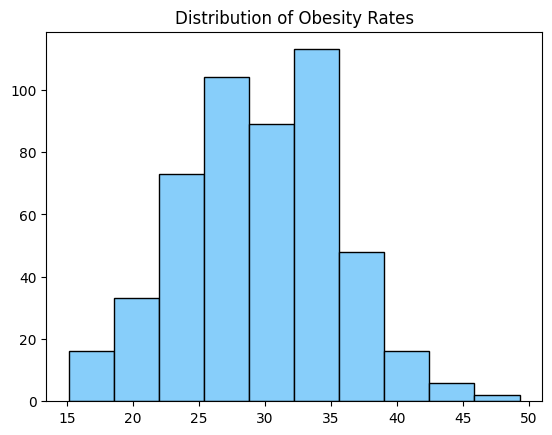

In [129]:
bin_count_S = int(np.ceil(np.log2(len(healthdf))) + 1) # use Sturge's rule to generate how many bins should be used for the data.

plt.title("Distribution of Obesity Rates")
plt.hist(healthdf["Obesity rate"], bins=bin_count_S, color="lightskyblue", edgecolor="k");

create a matlibplot histogram with 10 bins using the "**Obesity rate**" column from the **healthdf** DataFrame.

### Sleep Rate Histogram

In [122]:
q1 = healthdf["Sleep rate"].quantile(0.25)
q3 = healthdf["Sleep rate"].quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(healthdf) * (1 / 3))
bin_width

np.float64(0.07320000000000002)

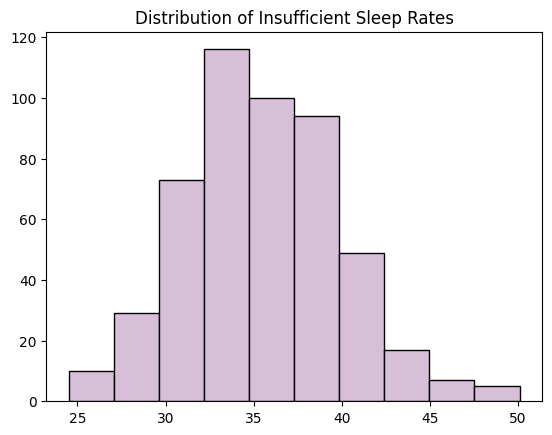

In [130]:
#Freedman-Diaconis rule gives an ugly amount of bins that doesn't communicate the data well.
#q1 = healthdf["Sleep rate"].quantile(0.25)
#q3 = healthdf["Sleep rate"].quantile(0.75)
#iqr = q3 - q1
#bin_width = (2 * iqr) / (len(healthdf) * (1 / 3))
#bin_count_FD = int(np.ceil((healthdf["Sleep rate"].max() - healthdf["Sleep rate"].min()) / bin_width))

bin_count_S = int(np.ceil(np.log2(len(healthdf))) + 1) # use Sturge's rule to generate how many bins should be used for the data.

plt.title("Distribution of Insufficient Sleep Rates")
plt.hist(healthdf["Sleep rate"], bins=bin_count_S, color="thistle", edgecolor="k");

create a matlibplot histogram with 10 bins using the "**Sleep rate**" column from the **healthdf** DataFrame.

### Correlation Scatterplot 

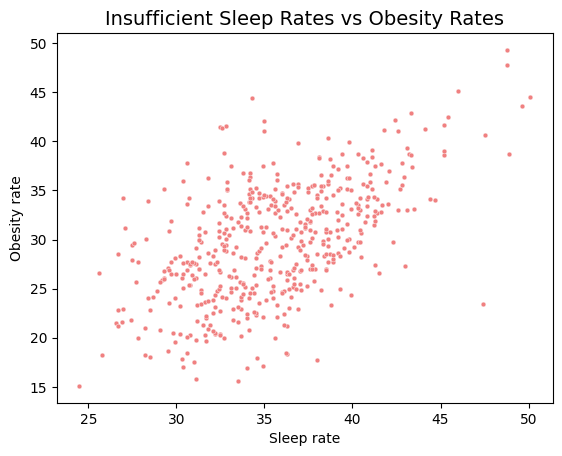

In [47]:
plt.title("Insufficient Sleep Rates vs Obesity Rates", fontsize=14)
sns.scatterplot(data=healthdf, 
                x="Sleep rate", 
                y="Obesity rate", 
                color="lightcoral", 
                s=12);

create a seaborn scatterplot that compares the **Insufficient Sleep rate** (x) vs **Obesity rate** (y).

### Correlation Heatmap

In [93]:
# healthdf.corr() # running this line of code will show that the DataFrame is not capable of drawing correlations.
healthdf_corr = healthdf.drop(["StateAbbr", "PlaceName", "PlaceFIPS"], axis=1) # Remove the columns that don't contain numerical data
# healthdf_corr # Verify the new DataFrame displays correctly
healthdf_corr.corr()

,Binge rate,Cancer rate,Diabetes rate,Mental health rate,Obesity rate,Sleep rate
Binge rate,1.000000,-0.088671,-0.537899,-0.386208,-0.293567,-0.398246
Cancer rate,-0.088671,1.000000,0.052244,0.040830,-0.026630,-0.090631
Diabetes rate,-0.537899,0.052244,1.000000,0.712230,0.729541,0.733621
Mental health rate,-0.386208,0.040830,0.712230,1.000000,0.752419,0.693540
Obesity rate,-0.293567,-0.026630,0.729541,0.752419,1.000000,0.563863
Sleep rate,-0.398246,-0.090631,0.733621,0.693540,0.563863,1.000000


create a version of the **healthdf** DataFrame that is useable for correlations.

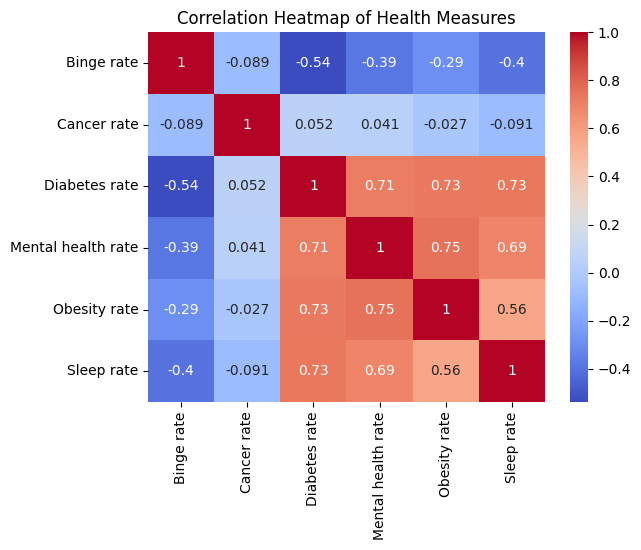

In [75]:
plt.title("Correlation Heatmap of Health Measures")
sns.heatmap(healthdf_corr.corr(), cmap="coolwarm", linecolor="black", linewidth=0.0, annot=True);

create a seaborn heatmap that showcases the correlatio variables for all Health Measures. 

### Final Figure

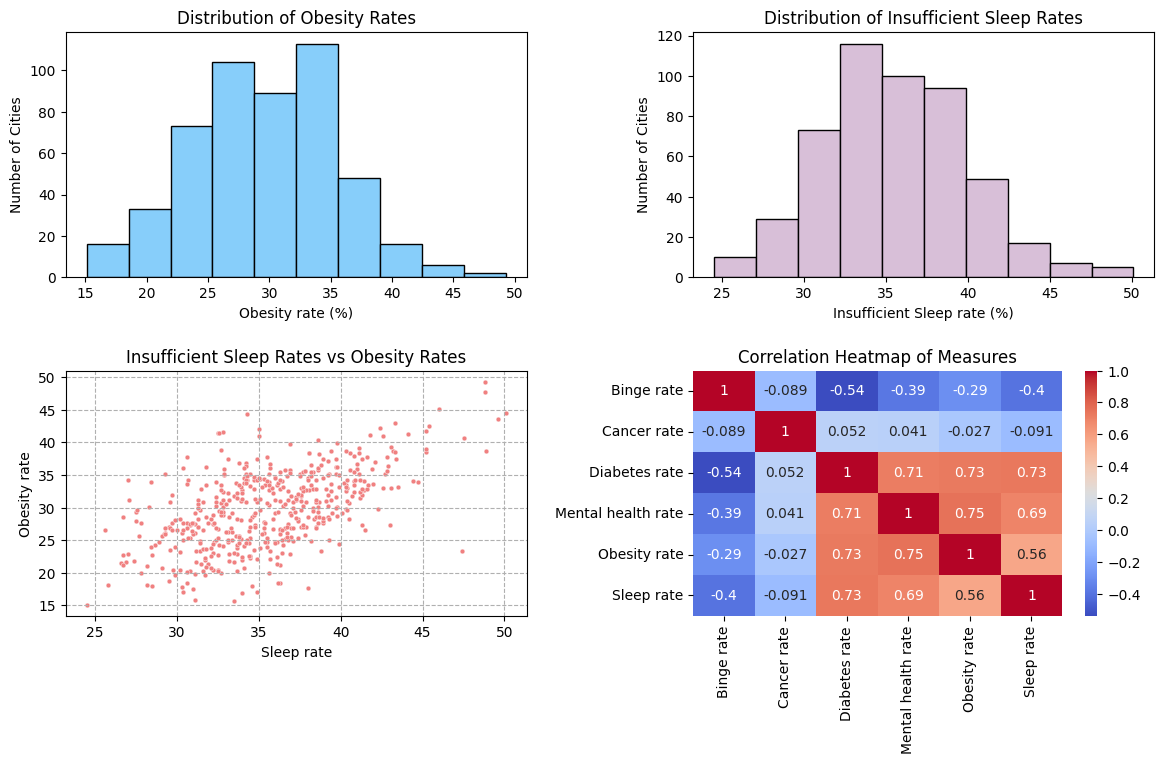

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # 2 by 2 layout with size 12 by 8


# Obesity Rate Histogram
# axes[0,0].grid(linestyle="--", zorder=0) # doesn't look good, zorder didn't put it behind the graph so idk
axes[0,0].hist(healthdf["Obesity rate"], bins=10, color="lightskyblue", edgecolor="k")
axes[0,0].set_xlabel('Obesity rate (%)')
axes[0,0].set_ylabel('Number of Cities')
axes[0,0].set_title("Distribution of Obesity Rates");


# Sleep Rate Histogram
# axes[0,1].grid(linestyle="--") # doesn't look good
axes[0,1].hist(healthdf["Sleep rate"], bins=10, color="thistle", edgecolor="k")
axes[0,1].set_xlabel('Insufficient Sleep rate (%)')
axes[0,1].set_ylabel('Number of Cities')
axes[0,1].set_title("Distribution of Insufficient Sleep Rates");


# Correlation Scatterplot
axes[1,0].grid(linestyle="--", zorder=0.5)
axes[1,0].set_title("Insufficient Sleep Rates vs Obesity Rates")
sns.scatterplot(data=healthdf, x="Sleep rate", y="Obesity rate", color="lightcoral", s=12, ax=axes[1,0])


# Correlation Heatmap 
axes[1,1].set_title('Correlation Heatmap of Measures')
sns.heatmap(healthdf_corr.corr(), cmap="coolwarm", linecolor="black", linewidth=0.0, annot=True, ax=axes[1,1]);

plt.tight_layout(pad=2) #add a small padding

create a grid figure including the charts that were made in previous steps.